<a href="https://colab.research.google.com/github/TwoManyHands/Algorithms/blob/main/bank_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.model_selection import train_test_split

bankData=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chapter3/bank-full.csv',sep=';')

In [73]:
filter_mask=bankData['y']=='yes'
bankSub1=bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()
bankSub1[70:73]

,age,agegrp
70,90,2
71,92,2
72,93,2


# Employment Propensity

In [74]:
jobProp=bankData.groupby(['job','y'])['y'].agg(jobCat='count').reset_index()

In [75]:
empTot=bankData.groupby('age')['y'].agg(ageTot='count').reset_index()
ageTot.head()

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [76]:
jobList=bankData['job'].unique().tolist()
print(jobList)
len(jobList)

['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']


12

In [77]:
jobStatusTot=bankData.groupby('job')['y'].agg(jobStatusTot='count').reset_index()
jobStatusTot

,job,jobStatusTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


# Merge the two dataframes

In [78]:
jobComb=pd.merge(jobProp,jobStatusTot,left_on=['job'],right_on=['job'])
jobComb['catProp']=(jobComb.jobCat/jobComb.jobStatusTot)*100
jobComb

,job,y,jobCat,jobStatusTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312
5,entrepreneur,yes,123,1487,8.271688
6,housemaid,no,1131,1240,91.209677
7,housemaid,yes,109,1240,8.790323
8,management,no,8157,9458,86.244449
9,management,yes,1301,9458,13.755551


In [79]:
yeses=jobComb[jobComb['y']=='yes']
nos=jobComb[jobComb['y']=='no']

In [80]:
nos

,job,y,jobCat,jobStatusTot,catProp
0,admin.,no,4540,5171,87.797331
2,blue-collar,no,9024,9732,92.725031
4,entrepreneur,no,1364,1487,91.728312
6,housemaid,no,1131,1240,91.209677
8,management,no,8157,9458,86.244449
10,retired,no,1748,2264,77.208481
12,self-employed,no,1392,1579,88.157061
14,services,no,3785,4154,91.116996
16,student,no,669,938,71.321962
18,technician,no,6757,7597,88.943004


In [81]:
yeses=yeses['catProp']
nos=nos['catProp']

In [85]:
nos

,catProp
0,87.797331
2,92.725031
4,91.728312
6,91.209677
8,86.244449
10,77.208481
12,88.157061
14,91.116996
16,71.321962
18,88.943004


# Use Matplotlib to visualise the job status propensity to buy

In [83]:
import matplotlib.pyplot as plt

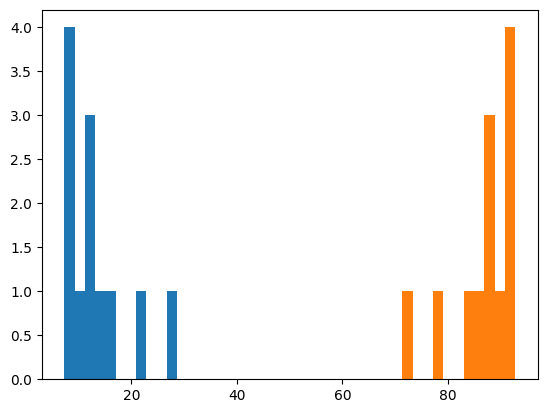

In [88]:
plt.hist(yeses,bins=11)
plt.hist(nos,bins=11)
x=range(len(jobList))
plt.xticks
plt.show()